<a href="https://colab.research.google.com/github/bagusamandira/Machine-Learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
df_raw = pd.read_csv('/titanic_train.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   /titanic_train.xlsx  891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  714 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Cabin                204 non-null    object 
 11  Embarked             889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

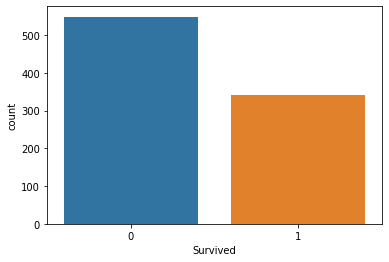

In [ ]:
#survivability

sns.countplot(x='Survived', data=df_raw)

<Axes: xlabel='Survived', ylabel='count'>

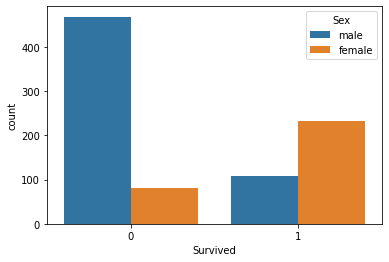

In [ ]:
#Survivability by sex

sns.countplot(x='Survived', hue='Sex', data=df_raw)

<Axes: xlabel='Survived', ylabel='count'>

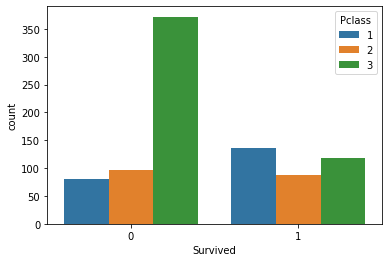

In [ ]:
#Pclass Survivability

sns.countplot(x='Survived', hue='Pclass', data=df_raw)

<Axes: xlabel='Pclass'>

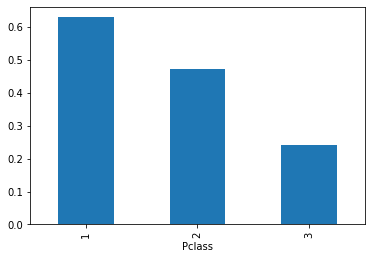

In [ ]:
#aggregate

df_raw.groupby('Pclass')['Survived'].mean().plot.bar()

<Axes: xlabel='Survived', ylabel='count'>

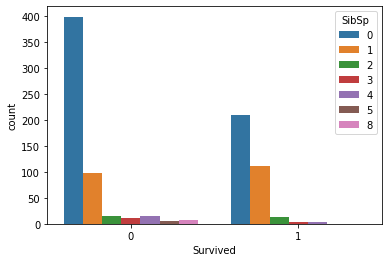

In [ ]:
#Survivability jika bawa sibling/spouse

sns.countplot(x='Survived', hue='SibSp', data=df_raw)

<Axes: xlabel='Survived', ylabel='count'>

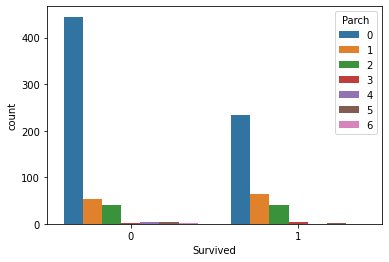

In [ ]:
#Survivability jika bawa parent/children

sns.countplot(x='Survived', hue='Parch', data=df_raw)

<Axes: >

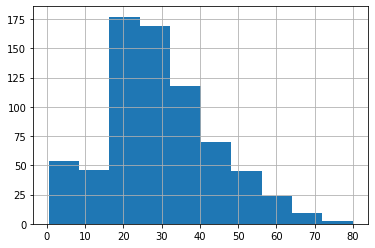

In [ ]:
#distribusi umur

df_raw['Age'].hist()

<Axes: xlabel='Survived', ylabel='Age'>

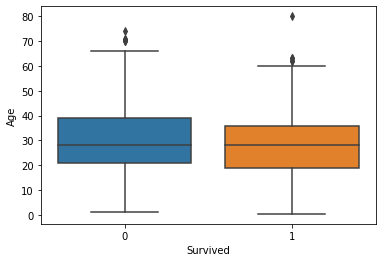

In [ ]:
#Perbandingan umur

sns.boxplot(x='Survived', y='Age', data=df_raw)

<Axes: xlabel='Pclass', ylabel='Age'>

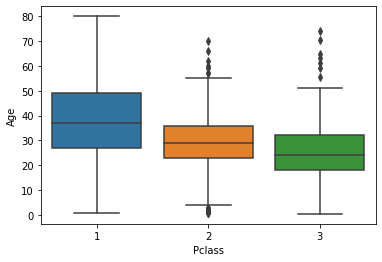

In [ ]:
#Perbandingan passenger class

sns.boxplot(x='Pclass', y='Age', data=df_raw)

In [ ]:
#age inputation

list_age = list(df_raw.groupby('Pclass')['Age'].mean())

def input_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return list_age[0]
    elif Pclass == 2:
      return list_age[1]
    else:
      return list_age[2]
  else:
    return Age

df_clean = df_raw.copy()
df_clean['Age'] = df_clean[['Age', 'Pclass']].apply(input_age, axis = 1)
df_clean.describe()

,/titanic_train.xlsx,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_clean.drop(['/titanic_train.xlsx','Name', 'Ticket', 'Cabin'], axis=1, inplace = True)
df_clean.dropna(inplace=True)
df_clean.reset_index(inplace=True)


In [ ]:
df_eng = df_clean.copy()
df_eng

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,1,female,38.00000,1,0,71.2833,C
2,2,1,3,female,26.00000,0,0,7.9250,S
3,3,1,1,female,35.00000,1,0,53.1000,S
4,4,0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
884,886,0,2,male,27.00000,0,0,13.0000,S
885,887,1,1,female,19.00000,0,0,30.0000,S
886,888,0,3,female,25.14062,1,2,23.4500,S
887,889,1,1,male,26.00000,0,0,30.0000,C


In [ ]:
#Feature engineering
sex = pd.get_dummies(df_eng['Sex'], drop_first=True)
embark = pd.get_dummies(df_eng['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
884,0,1
885,0,1
886,0,1
887,0,0


In [ ]:
#Finalize

df_eng.drop(['Sex', 'Embarked'],axis=1,inplace=True)
df_eng = pd.concat([df_eng, sex, embark],axis=1)
df_final = df_eng.copy()
df_final

,index,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,1,38.00000,1,0,71.2833,0,0,0
2,2,1,3,26.00000,0,0,7.9250,0,0,1
3,3,1,1,35.00000,1,0,53.1000,0,0,1
4,4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
884,886,0,2,27.00000,0,0,13.0000,1,0,1
885,887,1,1,19.00000,0,0,30.0000,0,0,1
886,888,0,3,25.14062,1,2,23.4500,0,0,1
887,889,1,1,26.00000,0,0,30.0000,1,0,0


In [ ]:
df_final.drop(['index'],axis=1,inplace=True)

In [ ]:
df_final

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
884,0,2,27.00000,0,0,13.0000,1,0,1
885,1,1,19.00000,0,0,30.0000,0,0,1
886,0,3,25.14062,1,2,23.4500,0,0,1
887,1,1,26.00000,0,0,30.0000,1,0,0


In [ ]:
#library training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
#splitting data

x_train, x_validation, y_train, y_validation = train_test_split(df_final.drop(['Survived'], axis=1),df_final['Survived'],test_size=0.3,random_state=111)

In [ ]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
228,3,25.14062,3,1,25.4667,0,0,1
195,3,25.14062,0,0,7.7500,1,1,0
150,1,22.00000,1,0,66.6000,0,0,1
380,3,1.00000,0,2,15.7417,0,0,0
134,2,23.00000,0,0,15.0458,1,0,0
...,...,...,...,...,...,...,...,...
275,3,45.00000,0,0,7.7500,0,0,1
86,3,25.14062,0,0,8.0500,1,0,1
724,3,20.00000,0,0,8.6625,1,0,1
876,3,25.14062,0,0,7.8958,1,0,1


In [ ]:
#training

log_model = LogisticRegression(n_jobs=4)
log_model.fit(x_train, y_train)

predict = log_model.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       386
           1       0.77      0.68      0.72       236

    accuracy                           0.80       622
   macro avg       0.79      0.78      0.78       622
weighted avg       0.80      0.80      0.80       622



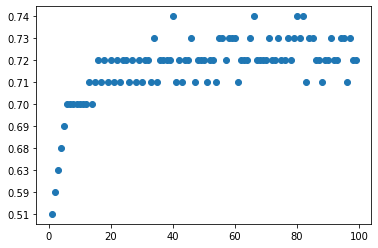

In [ ]:
#optimization, cari nilai c terbaik menggunakan iterasi
iterasi = 100
f1 = [0]*iterasi
id = [0]*iterasi

for i in range(1, iterasi):
  log_model = LogisticRegression(n_jobs=4, C=i/100)
  log_model.fit(x_train, y_train)
  predict = log_model.predict(x_train)
  report = classification_report(y_train, predict)
  l=report.split()
  f1[i] = l[12]
  id[i] = i

plt.scatter(id[1:],f1[1:])
plt.show()

In [ ]:
pd.Series(f1).head(40)

0        0
1     0.51
2     0.59
3     0.63
4     0.68
5     0.69
6     0.70
7     0.70
8     0.70
9     0.70
10    0.70
11    0.70
12    0.70
13    0.71
14    0.70
15    0.71
16    0.72
17    0.71
18    0.72
19    0.71
20    0.72
21    0.71
22    0.72
23    0.71
24    0.72
25    0.72
26    0.71
27    0.72
28    0.71
29    0.72
30    0.71
31    0.72
32    0.72
33    0.71
34    0.73
35    0.71
36    0.72
37    0.72
38    0.72
39    0.72
dtype: object

In [ ]:
# training with best parameters
log_model = LogisticRegression(n_jobs=4, C=16/100)
log_model.fit(x_train, y_train)

predict = log_model.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       386
           1       0.77      0.67      0.72       236

    accuracy                           0.80       622
   macro avg       0.79      0.78      0.78       622
weighted avg       0.80      0.80      0.80       622

